# SVC

In [ ]:
import numpy as np
from sklearn import datasets
iris=datasets.load_iris()
x=iris["data"][:,(2,3)] #petal length , petal width
y=(iris["target"]==2).astype(np.float64)  # virginica

In [ ]:
from sklearn.svm import SVC
svc_clf=SVC(kernel="linear", C=1) #C=float("inf")
svc_clf.fit(x,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it
is much slower, especially with large training sets, so it is not recommended. Another
option is to use the SGDClassifier class, with SGDClassifier(loss="hinge",
alpha=1/(m*C)). This applies regular Stochastic Gradient Descent (see Chapter 4) to
train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it
can be useful to handle huge datasets that do not fit in memory (out-of-core training),
or to handle online classification tasks.

The function max(0, 1 – t) is called the hinge loss function (represented below). It is
equal to 0 when t ≥ 1. Its derivative (slope) is equal to –1 if t < 1 and 0 if t > 1.

In [ ]:
svc_clf

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_clf.predict([[38,3]])

array([1.])

In [ ]:
print(len(svc_clf.support_vectors_),svc_clf.support_vectors_)

24 [[4.7 1.4]
 [4.9 1.5]
 [4.6 1.5]
 [4.7 1.6]
 [4.7 1.4]
 [4.8 1.8]
 [4.9 1.5]
 [4.8 1.4]
 [5.  1.7]
 [5.1 1.6]
 [4.5 1.6]
 [4.7 1.5]
 [4.5 1.7]
 [5.  1.5]
 [4.9 2. ]
 [4.9 1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.1 1.5]
 [5.6 1.4]
 [4.8 1.8]
 [5.1 1.9]
 [5.  1.9]
 [5.1 1.8]]


In [ ]:
print(svc_clf.coef_,svc_clf.intercept_)

[[2.1829247  2.25365588]] [-14.41486828]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
yp=svc_clf.predict(x)
print(confusion_matrix(y,yp))
print(classification_report(y,yp))

[[97  3]
 [ 2 48]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       100
         1.0       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150



# LinearSVC

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
iris=datasets.load_iris()
x=iris["data"][:,(2,3)] #petal length , petal width
y=(iris["target"]==2).astype(np.float64)  # virginica

In [ ]:
x.shape

(150, 2)

In [ ]:
y.shape

(150,)

In [ ]:
svm_clf=Pipeline((
                ("scaler",StandardScaler()),
                 ("linear_svc",LinearSVC(C=1,loss="hinge")),
                 ))

In [ ]:
print(x)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [ ]:
svm_clf.fit(x,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([[38,3]])

array([1.])

In [ ]:
print(len(svm_clf.support_vectors_),svm_clf.support_vectors_)

AttributeError: ignored

# Scaling and without scaling using SVC and LinearSVC

In [ ]:
svm_clf_nos=LinearSVC()#LinearSVC()
svm_clf_nos.fit(x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xscale=scale.fit_transform(x)

In [ ]:
xscale

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

In [ ]:
svm_clf_s=LinearSVC()#LinearSVC()
svm_clf_s.fit(xscale,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
ypred=svm_clf_nos.predict(x)
print(confusion_matrix(y,ypred))
print(classification_report(y,ypred))

[[98  2]
 [ 4 46]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       100
         1.0       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
ypred=svm_clf_s.predict(xscale)
print(confusion_matrix(y,ypred))
print(classification_report(y,ypred))

[[97  3]
 [ 3 47]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       100
         1.0       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
print(svm_clf_nos.get_params())

{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [ ]:
print(len(svm_clf_nos.support_vectors_))
print(len(svm_clf_s.support_vectors_))

AttributeError: ignored

# Support vectors from LinearSVC

In [ ]:
decision_function = svm_clf.decision_function(x)
# we can also calculate the decision function manually
# decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
# The support vectors are the samples that lie within the margin
# boundaries, whose size is conventionally constrained to 1
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = x[support_vector_indices]

In [ ]:
print(len(support_vectors),support_vectors)

30 [[4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.6 1.5]
 [4.7 1.6]
 [4.7 1.4]
 [4.5 1.5]
 [4.5 1.5]
 [4.8 1.8]
 [4.9 1.5]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [5.1 1.9]
 [4.5 1.7]
 [5.  1.5]
 [4.9 1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.8 1.6]
 [5.1 1.5]
 [5.6 1.4]
 [4.8 1.8]
 [5.1 1.9]
 [5.  1.9]
 [5.1 1.8]]


In [ ]:
decision_function = svm_clf_s.decision_function(xscale)
# we can also calculate the decision function manually
# decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
# The support vectors are the samples that lie within the margin
# boundaries, whose size is conventionally constrained to 1
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = x[support_vector_indices]
print(len(support_vectors))

41


In [ ]:
support_vectors

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.2, 1.5],
       [4.7, 1.4],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.5, 1.5],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.6, 1.4],
       [5.1, 1.9],
       [5.6, 1.8],
       [4.5, 1.7],
       [5.1, 2. ],
       [5.3, 1.9],
       [5. , 2. ],
       [5.5, 1.8],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.8, 1.6],
       [5.1, 1.5],
       [5.6, 1.4],
       [5.5, 1.8],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

In [ ]:
print(len(decision_function),decision_function)

150 [-6.2561045  -6.2561045  -6.34261324 -6.16959576 -6.2561045  -5.54712729
 -6.031379   -6.16959576 -6.2561045  -6.39432126 -6.16959576 -6.08308702
 -6.48083    -6.74035621 -6.42912198 -5.72014477 -5.89316225 -6.031379
 -5.77185279 -5.94487026 -5.99657828 -5.72014477 -6.60213946 -5.32240179
 -5.8235608  -6.08308702 -5.63363603 -6.16959576 -6.2561045  -6.08308702
 -6.08308702 -5.72014477 -6.39432126 -6.2561045  -6.16959576 -6.42912198
 -6.34261324 -6.48083    -6.34261324 -6.16959576 -6.11788774 -6.11788774
 -6.34261324 -5.18418504 -5.37410981 -6.031379   -6.08308702 -6.2561045
 -6.16959576 -6.2561045  -0.70461015 -0.65290214 -0.30686718 -1.53489683
 -0.5663934  -1.10235313 -0.25515916 -2.81463449 -1.01584439 -1.39668007
 -2.64161701 -0.91242836 -2.20907331 -0.70461015 -1.88093178 -0.96413637
 -0.65290214 -2.12256457 -0.65290214 -2.07085656  0.28080057 -1.53489683
 -0.30686718 -1.15406115 -1.27537061 -0.96413637 -0.61810142  0.22909255
 -0.65290214 -2.64161701 -2.1573653  -2.46859953 -

# Non Linear SVM

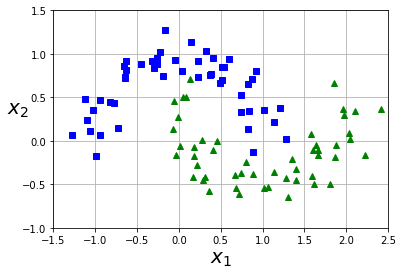

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y=], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')=1
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
print(X,X.shape,y)

[[ 1.61383833 -0.49115086]
 [ 0.08984723  0.50439056]
 [ 0.74721047 -0.36911116]
 [-1.10174514  0.23685641]
 [-0.72871455  0.14652347]
 [-0.65891281  0.857088  ]
 [ 0.22828266  0.73453868]
 [ 1.39439184 -0.45063627]
 [ 0.87158283  0.70852888]
 [ 0.88304472 -0.12658445]
 [ 0.38220326  0.76957897]
 [-0.32279169  0.92145523]
 [ 1.29900621 -0.64914275]
 [-0.63569974  0.91873422]
 [ 1.96899387  0.297549  ]
 [ 1.21073294  0.37721455]
 [ 1.13998191 -0.36088456]
 [ 1.06805159 -0.53460667]
 [ 0.49598571  0.66135542]
 [-0.26038715  0.88295876]
 [-0.06516219  0.13092506]
 [ 1.87005845 -0.18659309]
 [ 0.03146515  0.79868048]
 [-1.03151461  0.35788726]
 [ 0.45814234  0.00308109]
 [ 0.40767679  0.9574049 ]
 [-0.9379972   0.46846678]
 [ 2.02675758  0.09006383]
 [ 0.73867736  0.52356398]
 [ 0.71349755 -0.61055519]
 [ 0.92445501  0.79897643]
 [-1.05805492  0.1152524 ]
 [ 1.80904221 -0.49580332]
 [-0.17181754  1.27111359]
 [ 2.22167197 -0.16625369]
 [ 0.8346617   0.34040713]
 [ 0.28332589 -0.45537977]
 

In [ ]:
X[:, 1]

array([-0.49115086,  0.50439056, -0.36911116,  0.23685641,  0.14652347,
        0.857088  ,  0.73453868, -0.45063627,  0.70852888, -0.12658445,
        0.76957897,  0.92145523, -0.64914275,  0.91873422,  0.297549  ,
        0.37721455, -0.36088456, -0.53460667,  0.66135542,  0.88295876,
        0.13092506, -0.18659309,  0.79868048,  0.35788726,  0.00308109,
        0.9574049 ,  0.46846678,  0.09006383,  0.52356398, -0.61055519,
        0.79897643,  0.1152524 , -0.49580332,  1.27111359, -0.16625369,
        0.34040713, -0.45537977, -0.10997402,  0.81437199,  0.93666607,
       -0.17956306,  0.88489567,  0.3315385 ,  0.33716789,  0.94669172,
        1.03101899, -0.40456525,  1.13048376, -0.41220505,  0.85146409,
        1.01733299,  0.21402176,  0.75960715,  0.71898449,  0.65051142,
       -0.20663883,  0.35059194, -0.57201701,  0.73792076, -0.10190367,
        0.01455085,  0.66573923,  0.7055097 ,  0.48332509,  0.50889219,
       -0.39105811,  0.064055  , -0.23860829, -0.07268884,  0.36

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

[[-1.5        -1.45959596 -1.41919192 ...  2.41919192  2.45959596
   2.5       ]
 [-1.5        -1.45959596 -1.41919192 ...  2.41919192  2.45959596
   2.5       ]
 [-1.5        -1.45959596 -1.41919192 ...  2.41919192  2.45959596
   2.5       ]
 ...
 [-1.5        -1.45959596 -1.41919192 ...  2.41919192  2.45959596
   2.5       ]
 [-1.5        -1.45959596 -1.41919192 ...  2.41919192  2.45959596
   2.5       ]
 [-1.5        -1.45959596 -1.41919192 ...  2.41919192  2.45959596
   2.5       ]]


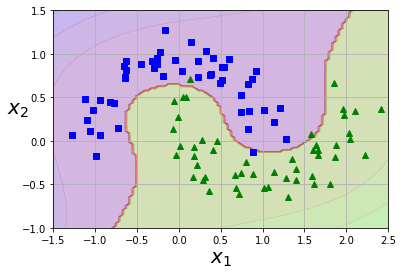

In [ ]:
import numpy as np
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) #Return evenly spaced numbers over a specified interval.
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    print(x0)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

In [ ]:
print(x0s,x1s,x0)

NameError: ignored

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
yp=rbf_kernel_svm_clf.predict(x)